# FILTRO FIR

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy.signal import firwin, lfilter


## EEG_reposo sin movimiento

(1024,)


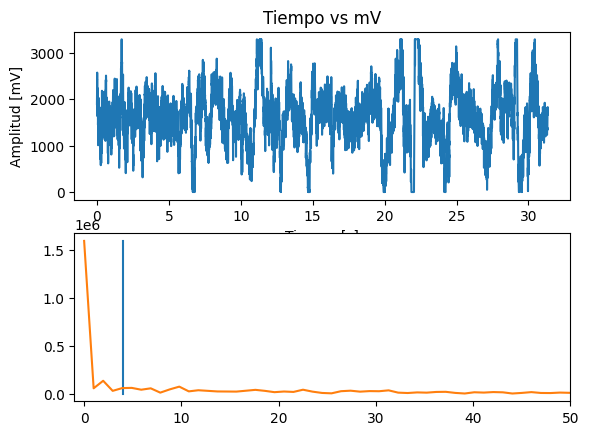

In [7]:
fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno1.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/fs;
#transformada de fourier FFT
N = 1024
X = np.fft.fft(x,N)
print(X.shape)

X = X[0:(N//2)]

#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, fs/2, N//2)

#eje de tiempo en seg
t = n/fs

#longitud de la ventana
M = 40
#frecuencia de corte en Hz
Fc = 4

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=fs)
w = np.round(w,3)
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y


plt.figure()
plt.subplot(2, 1, 1)
plt.title('Tiempo vs mV')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)
plt.show()

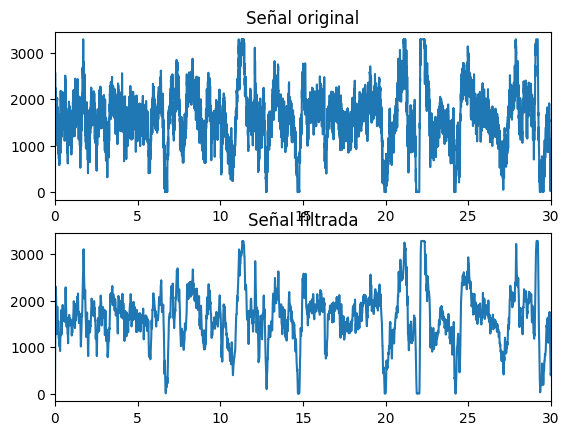

In [8]:
y = lfilter(w, np.array(1),x)
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)


Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.figure()
plt.subplot(2, 1, 1)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()

## EEG_OjosAbiertos_OjosCerrados

(1024,)


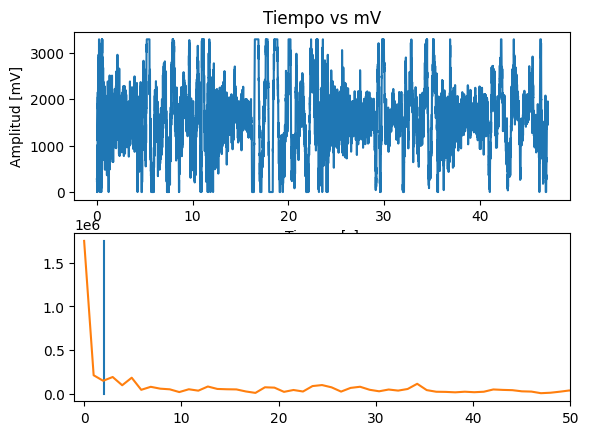

In [15]:
fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno2.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/fs;
#transformada de fourier FFT
N = 1024
X = np.fft.fft(x,N)
print(X.shape)

X = X[0:(N//2)]

#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, fs/2, N//2)

#eje de tiempo en seg
t = n/fs

#longitud de la ventana
M = 40
#frecuencia de corte en Hz
Fc = 2

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=fs)
w = np.round(w,3)
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y


plt.figure()
plt.subplot(2, 1, 1)
plt.title('Tiempo vs mV')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)
plt.show()

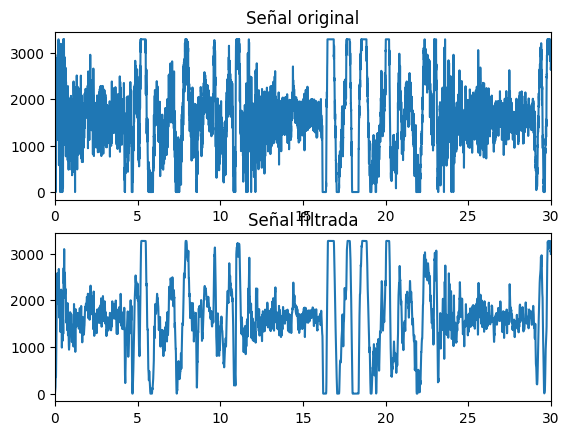

In [16]:
y = lfilter(w, np.array(1),x)
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)


Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.figure()
plt.subplot(2, 1, 1)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()

## EEG_Referencia

(1024,)


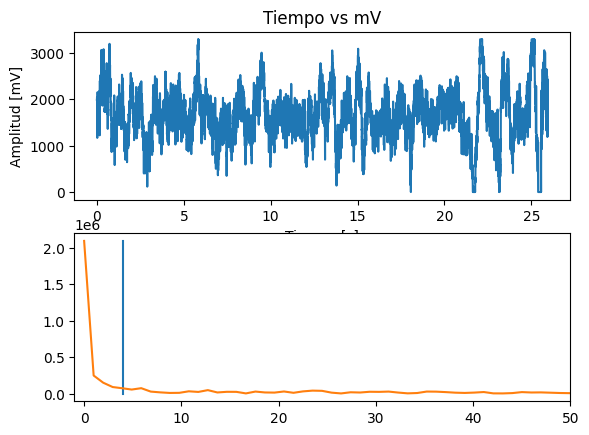

In [17]:
fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno3.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/fs;
#transformada de fourier FFT
N = 1024
X = np.fft.fft(x,N)
print(X.shape)

X = X[0:(N//2)]

#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, fs/2, N//2)

#eje de tiempo en seg
t = n/fs

#longitud de la ventana
M = 40
#frecuencia de corte en Hz
Fc = 4

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=fs)
w = np.round(w,3)
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y


plt.figure()
plt.subplot(2, 1, 1)
plt.title('Tiempo vs mV')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)
plt.show()

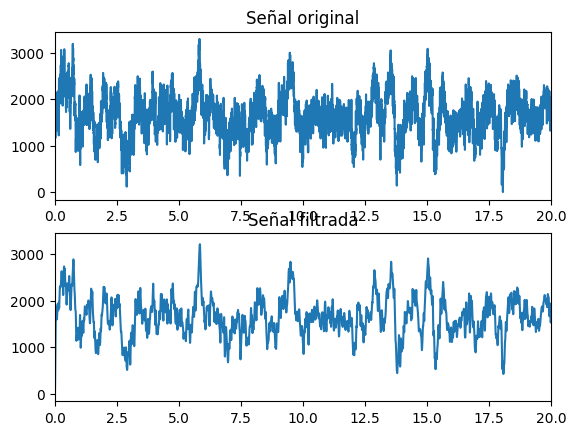

In [18]:
y = lfilter(w, np.array(1),x)
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)


Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.figure()
plt.subplot(2, 1, 1)
plt.title("Señal original")
plt.xlim(0,20)
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.title("Señal filtrada")
plt.xlim(0,20)
plt.plot(ts,y)
plt.show()

## EEG_Resolucion_mat

(1024,)


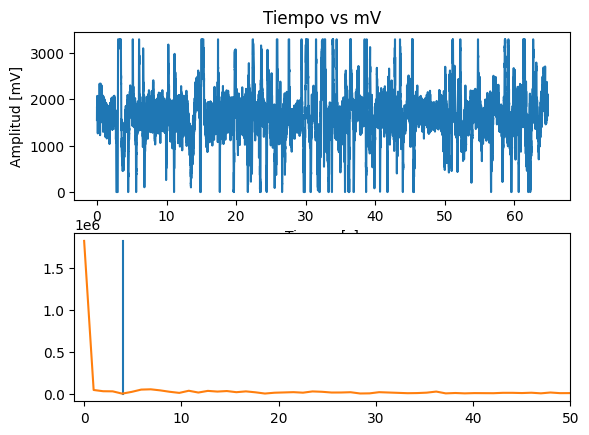

In [19]:
fs= 1000;

# Ruta al archivo de texto
archivo = 'bruno4.txt'

# Leer el archivo omitiendo las líneas de comentarios y el encabezado
data = pd.read_csv(archivo, delimiter='\t', comment='#', header=None)

# Extraer la sexta columna, que corresponde al índice 5 (los índices empiezan en 0)
amplitud = data.iloc[:, 5]

# Convertir los datos de la sexta columna a una lista de Python

# Convertir valores crudos a milivoltios
voltaje_por_unidad = 3.3 / 1023

x = amplitud * voltaje_por_unidad * 1000  # Conversión a mV
# Crear una lista para el eje X, que va desde 1 hasta el número de elementos en valores_y
n = np.arange(1, len(x) + 1)
ts=n/fs;
#transformada de fourier FFT
N = 1024
X = np.fft.fft(x,N)
print(X.shape)

X = X[0:(N//2)]

#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, fs/2, N//2)

#eje de tiempo en seg
t = n/fs

#longitud de la ventana
M = 40
#frecuencia de corte en Hz
Fc = 4

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=fs)
w = np.round(w,3)
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y


plt.figure()
plt.subplot(2, 1, 1)
plt.title('Tiempo vs mV')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud [mV]')
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.plot(Rx,Ry)
plt.plot(F,Xm)
plt.xlim(-1,50)
plt.show()

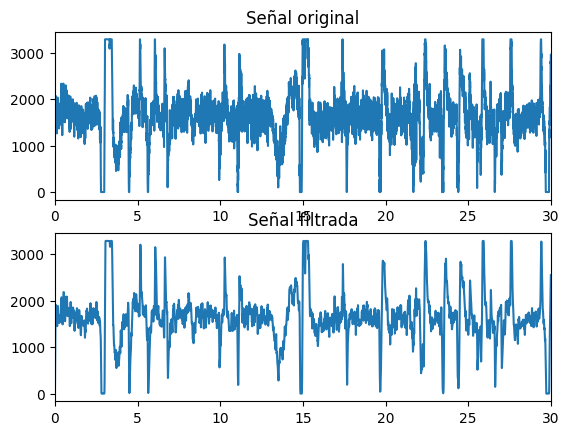

In [20]:
y = lfilter(w, np.array(1),x)
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)


Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.figure()
plt.subplot(2, 1, 1)
plt.title("Señal original")
plt.xlim(0,30)
plt.plot(ts,x)

plt.subplot(2, 1, 2)
plt.title("Señal filtrada")
plt.xlim(0,30)
plt.plot(ts,y)
plt.show()